# Albone Case Study

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from collections import Counter
pd.set_option('max_columns',None)
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()


## Importing the Dataset 

In [2]:
df=pd.read_csv(r"C:\Users\Harshitha\Downloads\abalone.csv")

In [3]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


there are 12 columns. 
11 independent variables are continuos data 1 dependent variable (quality) is categorical data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df.shape

(4177, 9)

In [7]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [8]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

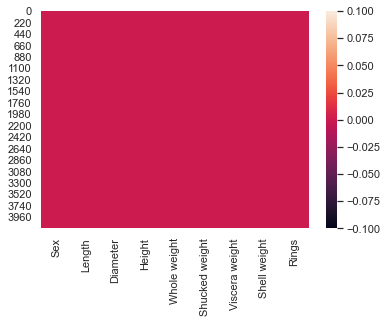

In [9]:
sns.heatmap(df.isnull())

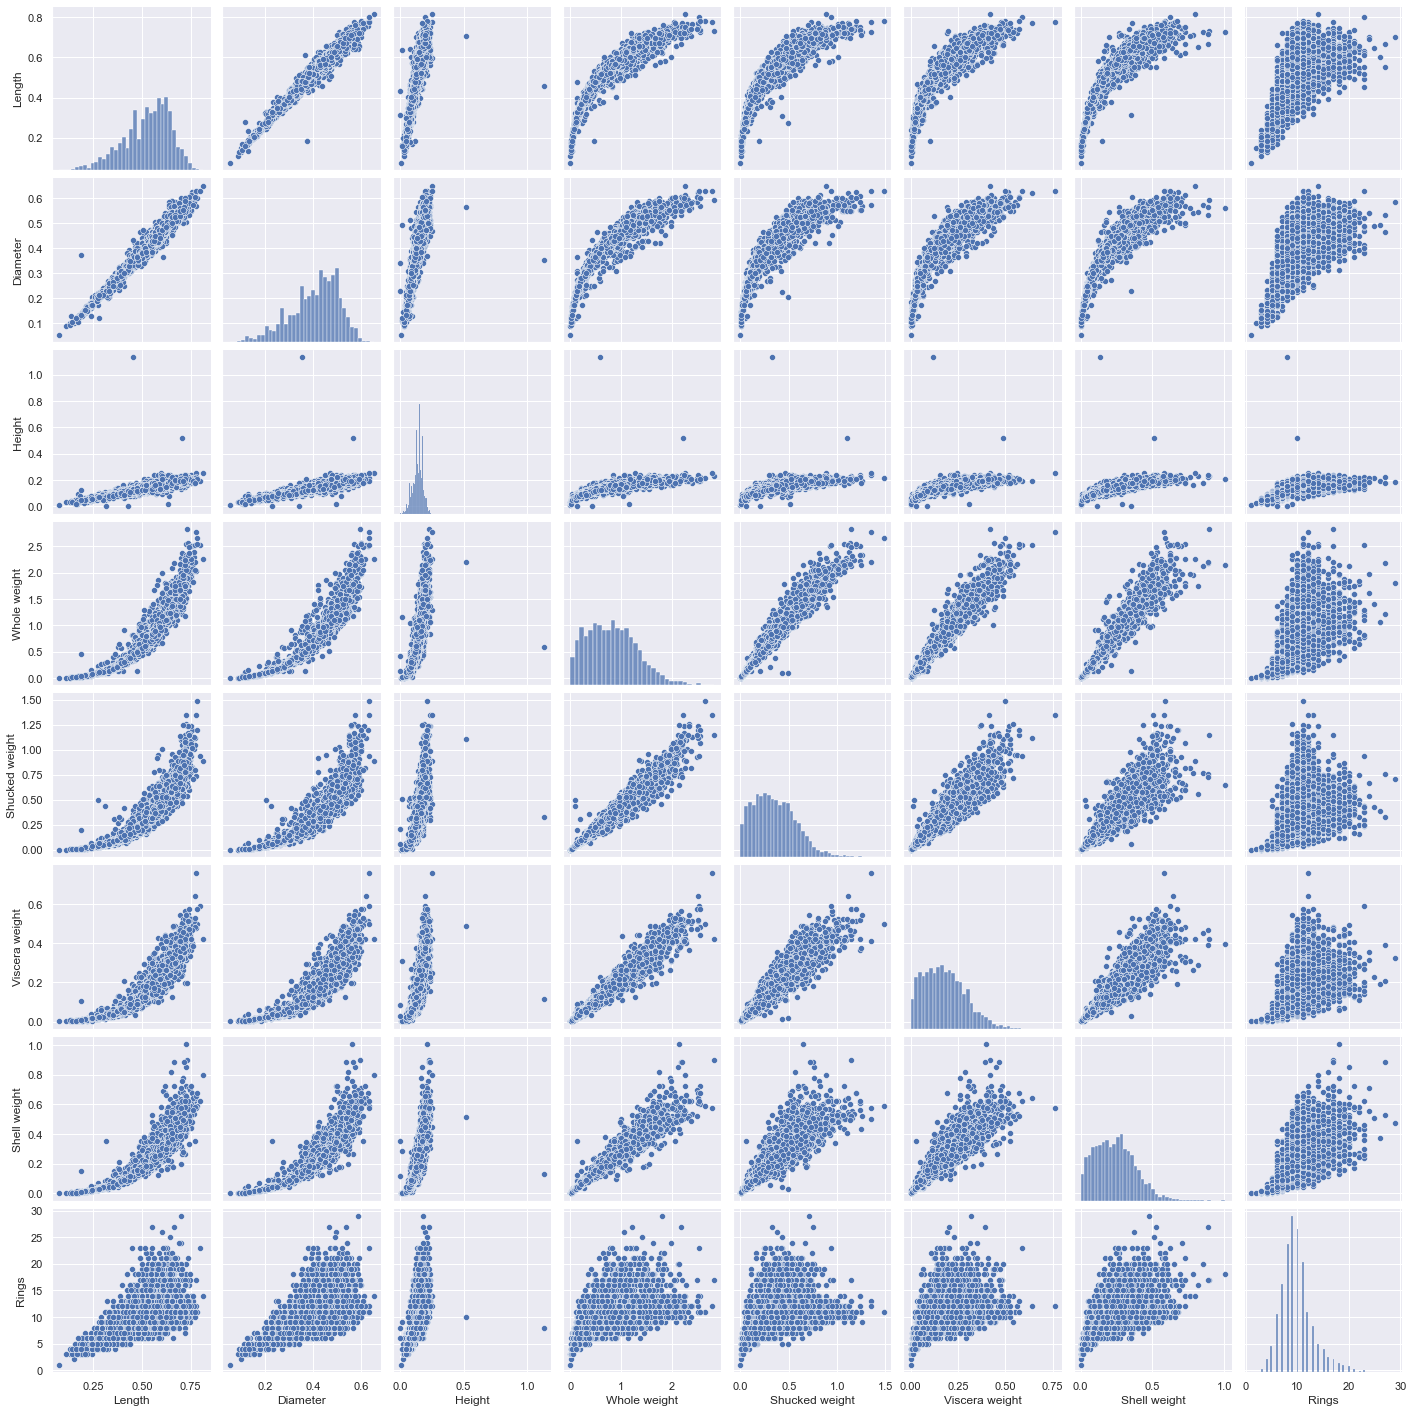

In [10]:
sns.pairplot(df)

## Checking for Correlation 

In [11]:
dfcor=df.corr()
dfcor

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


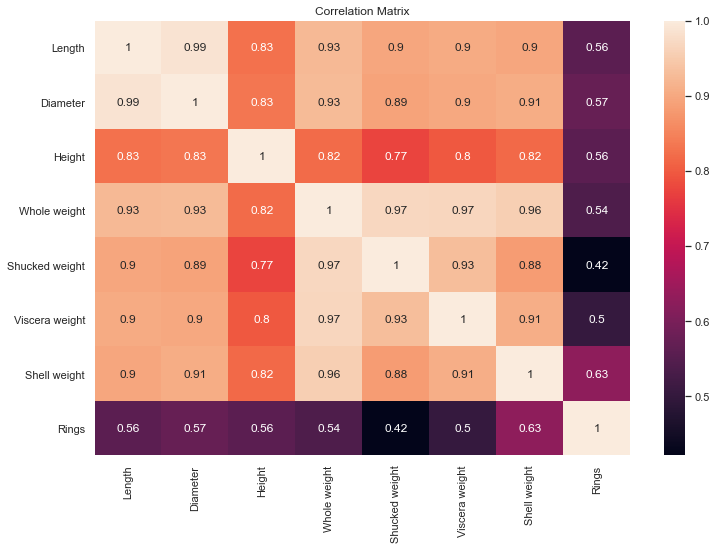

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

The lighter color : Highly correlated Darker color : Negative correlationLight shades are highly correlated Rings column is highly correlated with Shell weight Rings is slightly negative correlation with Shucked weight Rings columns is having almost good correlation with every column. No negative correlation is there.


## Checking Skewness

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

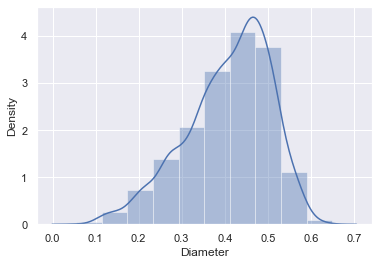

In [13]:
#little bit of skeweness
sns.distplot(df['Diameter'],bins=10)

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

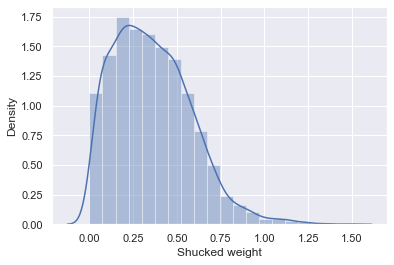

In [14]:
# skewed data
sns.distplot(df['Shucked weight'],bins=20)

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

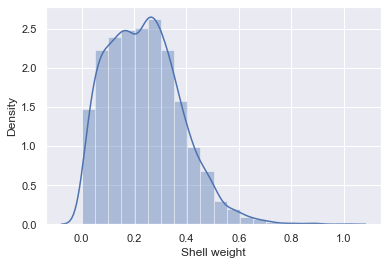

In [15]:
# little bit of skeweness
sns.distplot(df['Shell weight'],bins=20)

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

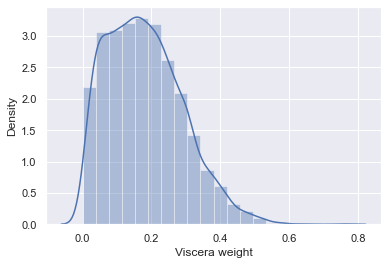

In [16]:
# little bit of skeweness
sns.distplot(df['Viscera weight'],bins=20)

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

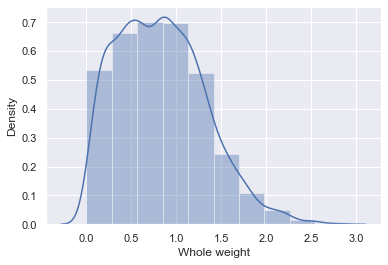

In [17]:
sns.distplot(df['Whole weight'],bins=10)

In [18]:
collist=df.columns.values
ncol=8
nrows=10

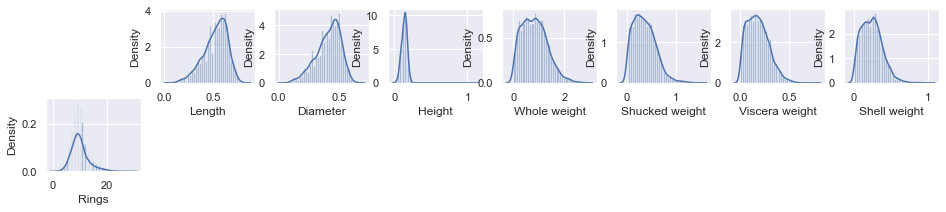

In [19]:

# plt.figure(figsize=(5*totalcol,5*totalcol))
plt.figure(figsize=(16,16))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

observations: We can see that some skewness is there in columns whole weight, shell weight and height

<AxesSubplot:xlabel='Sex', ylabel='count'>

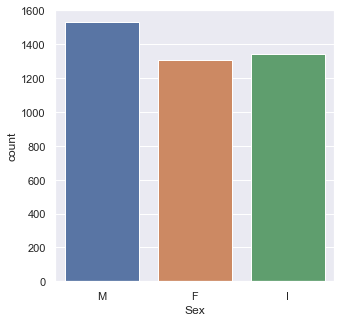

In [20]:
plt.figure(figsize=(5,5))
sns.countplot(df["Sex"])

By checking graph , we observe that count of different gender as: Male = 1500 female = 1300 I = 1320

## Checking Outliers

<AxesSubplot:>

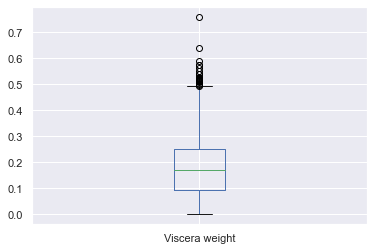

In [21]:
# outliers are present here in this column
df['Viscera weight'].plot.box()

<AxesSubplot:>

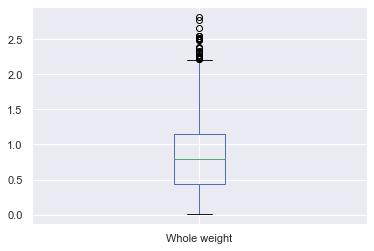

In [22]:
# outliers are present here in this column
df['Whole weight'].plot.box()

<AxesSubplot:>

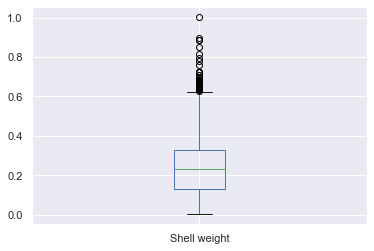

In [23]:
# outliers are present here in this column
df['Shell weight'].plot.box()

<AxesSubplot:>

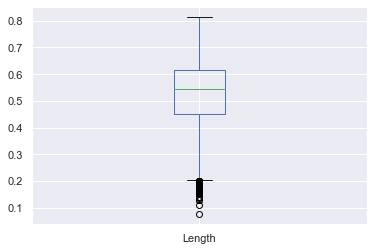

In [24]:
# outliers are present here in this column
df['Length'].plot.box()

<AxesSubplot:>

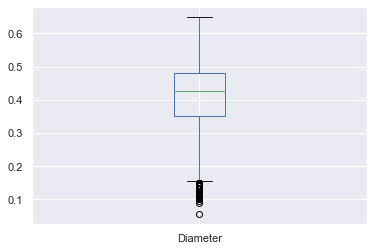

In [25]:
# outliers are present here in this column
df['Diameter'].plot.box()

In [26]:
collist=df.columns.values
ncol=8
nrows=10

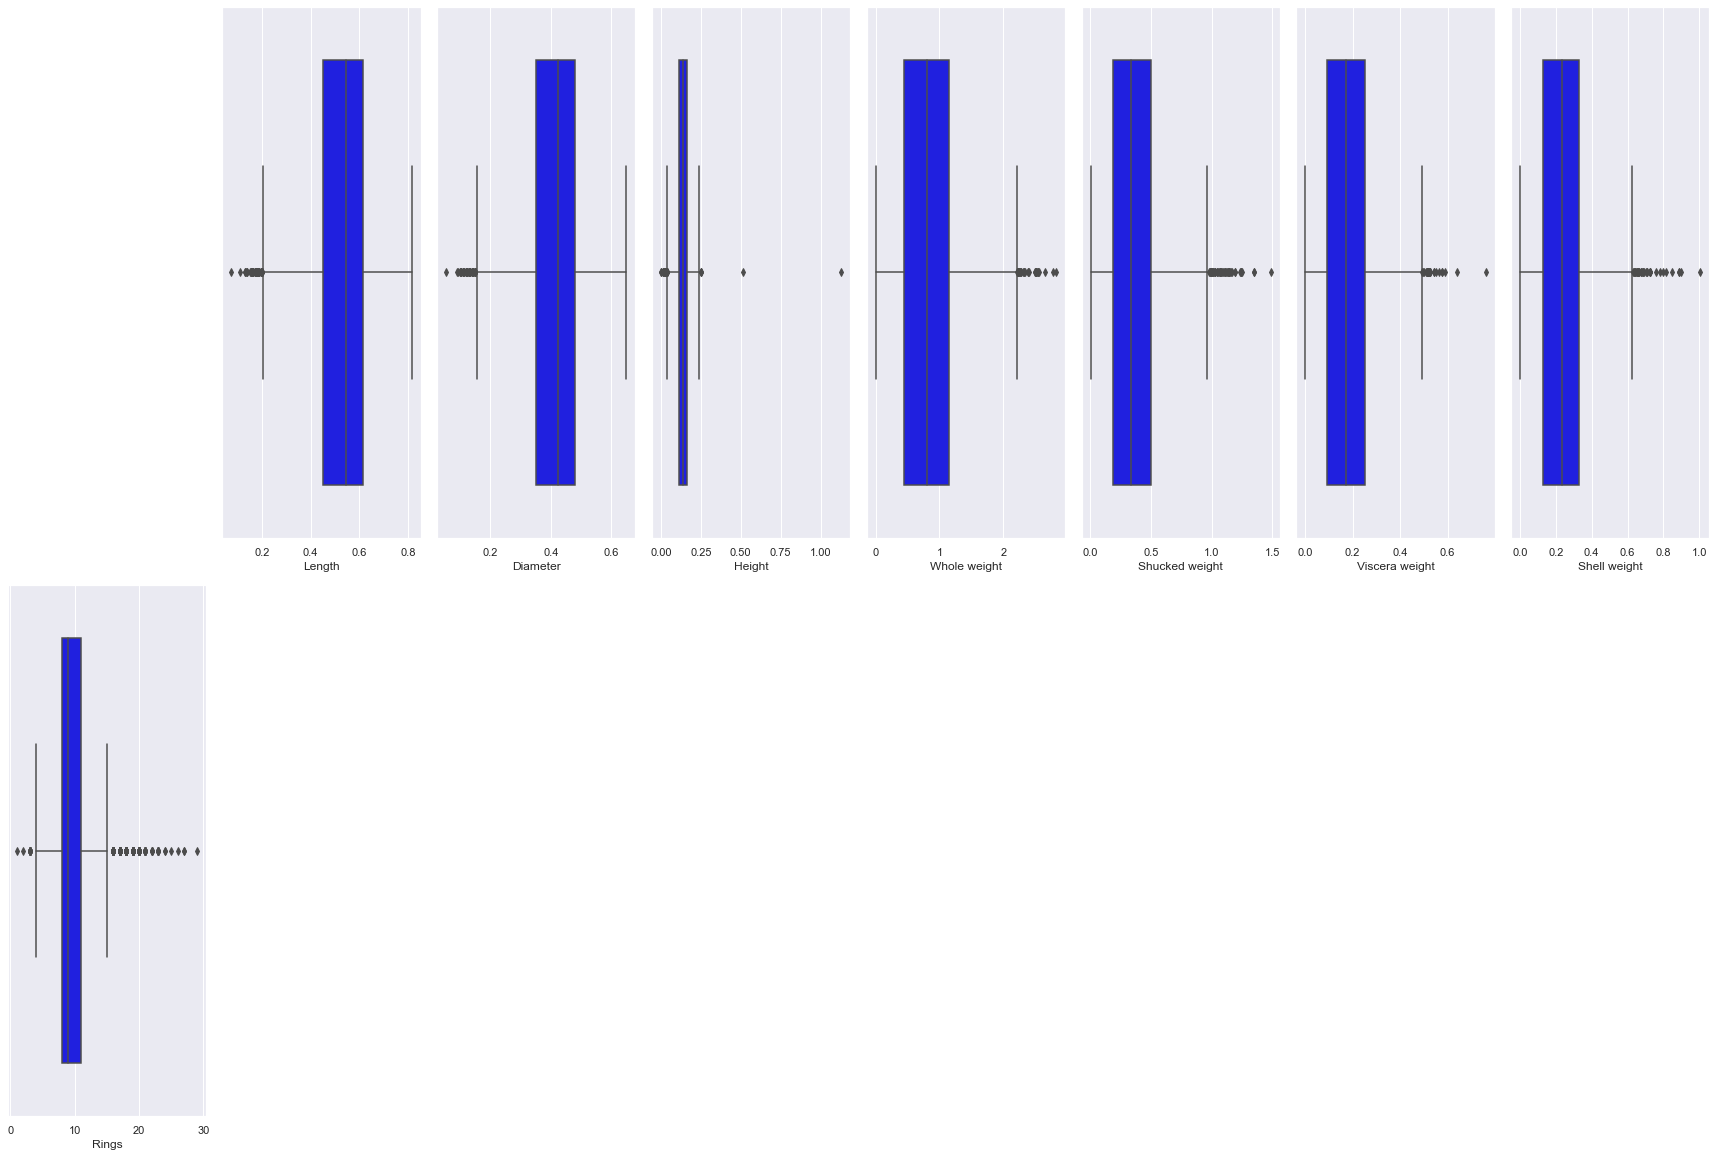

In [27]:
plt.figure(figsize=(3*ncol,10*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='Blue',orient='v')
    plt.tight_layout()

<AxesSubplot:xlabel='Rings', ylabel='count'>

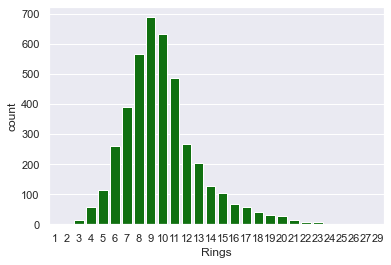

In [28]:
sns.countplot(x='Rings',data=df,color='Green')

Here observing the no of rings i.e. our target variable The No 9th ring has the maximum number of counts

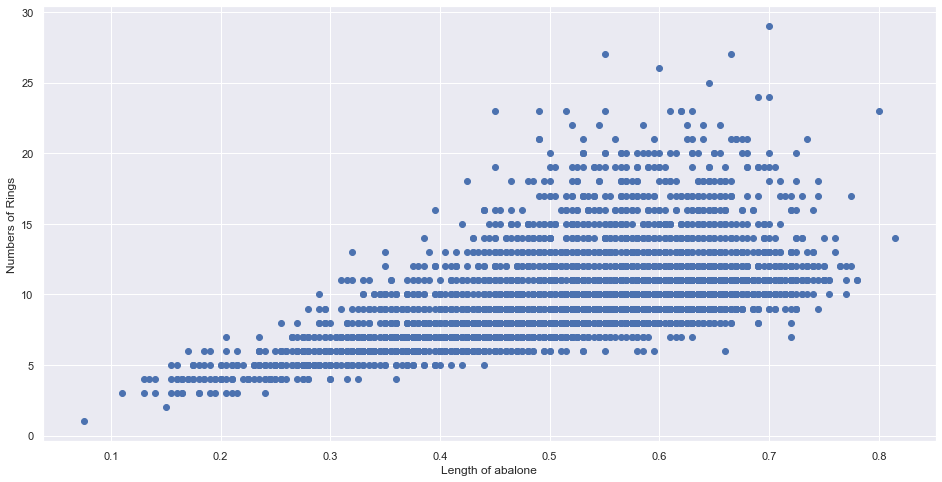

In [29]:
plt.figure(figsize=(16,8))
plt.scatter(data=df,x='Length',y='Rings')
plt.xlabel('Length of abalone')
plt.ylabel('Numbers of Rings')
plt.show()

the no of rings is directly porportional to the length of the abalone

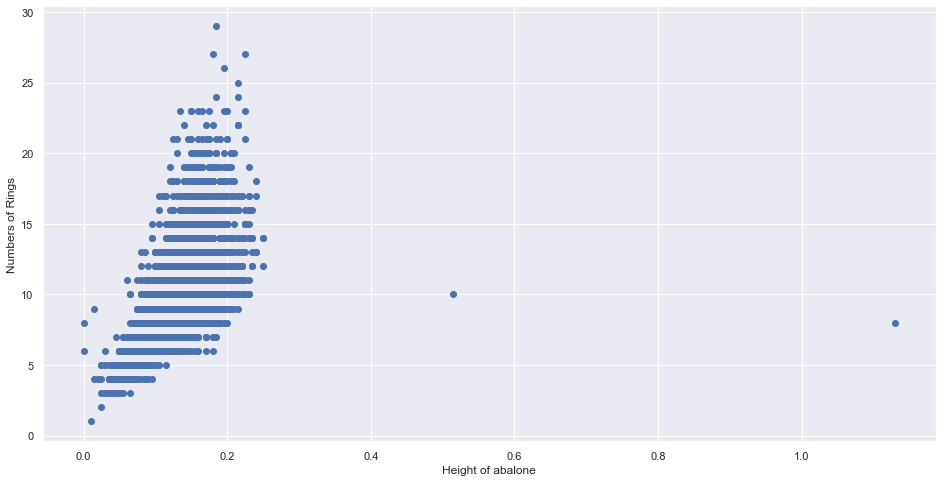

In [30]:
plt.figure(figsize=(16,8))
plt.scatter(data=df,x='Height',y='Rings')
plt.xlabel('Height of abalone')
plt.ylabel('Numbers of Rings')
plt.show()

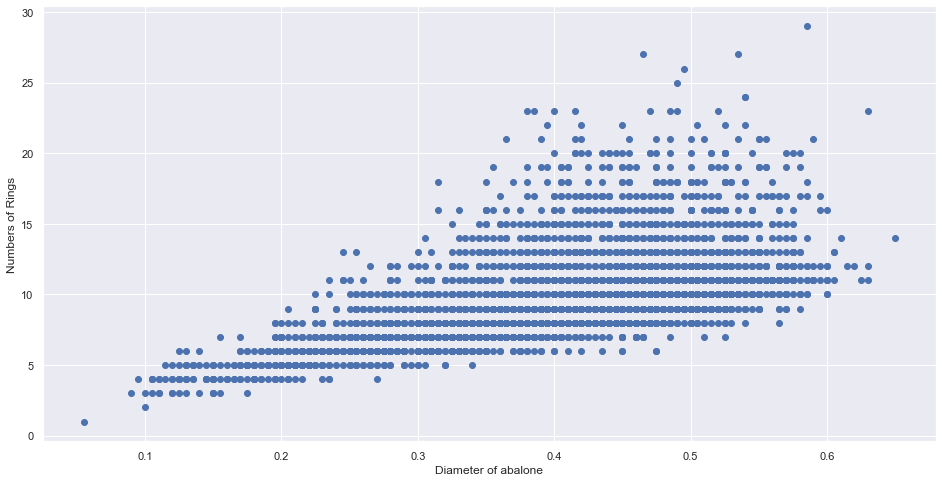

In [31]:
plt.figure(figsize=(16,8))
plt.scatter(data=df,x='Diameter',y='Rings')
plt.xlabel('Diameter of abalone')
plt.ylabel('Numbers of Rings')
plt.show()


 the no of rings is directly porportional to the Diameter of the abalone

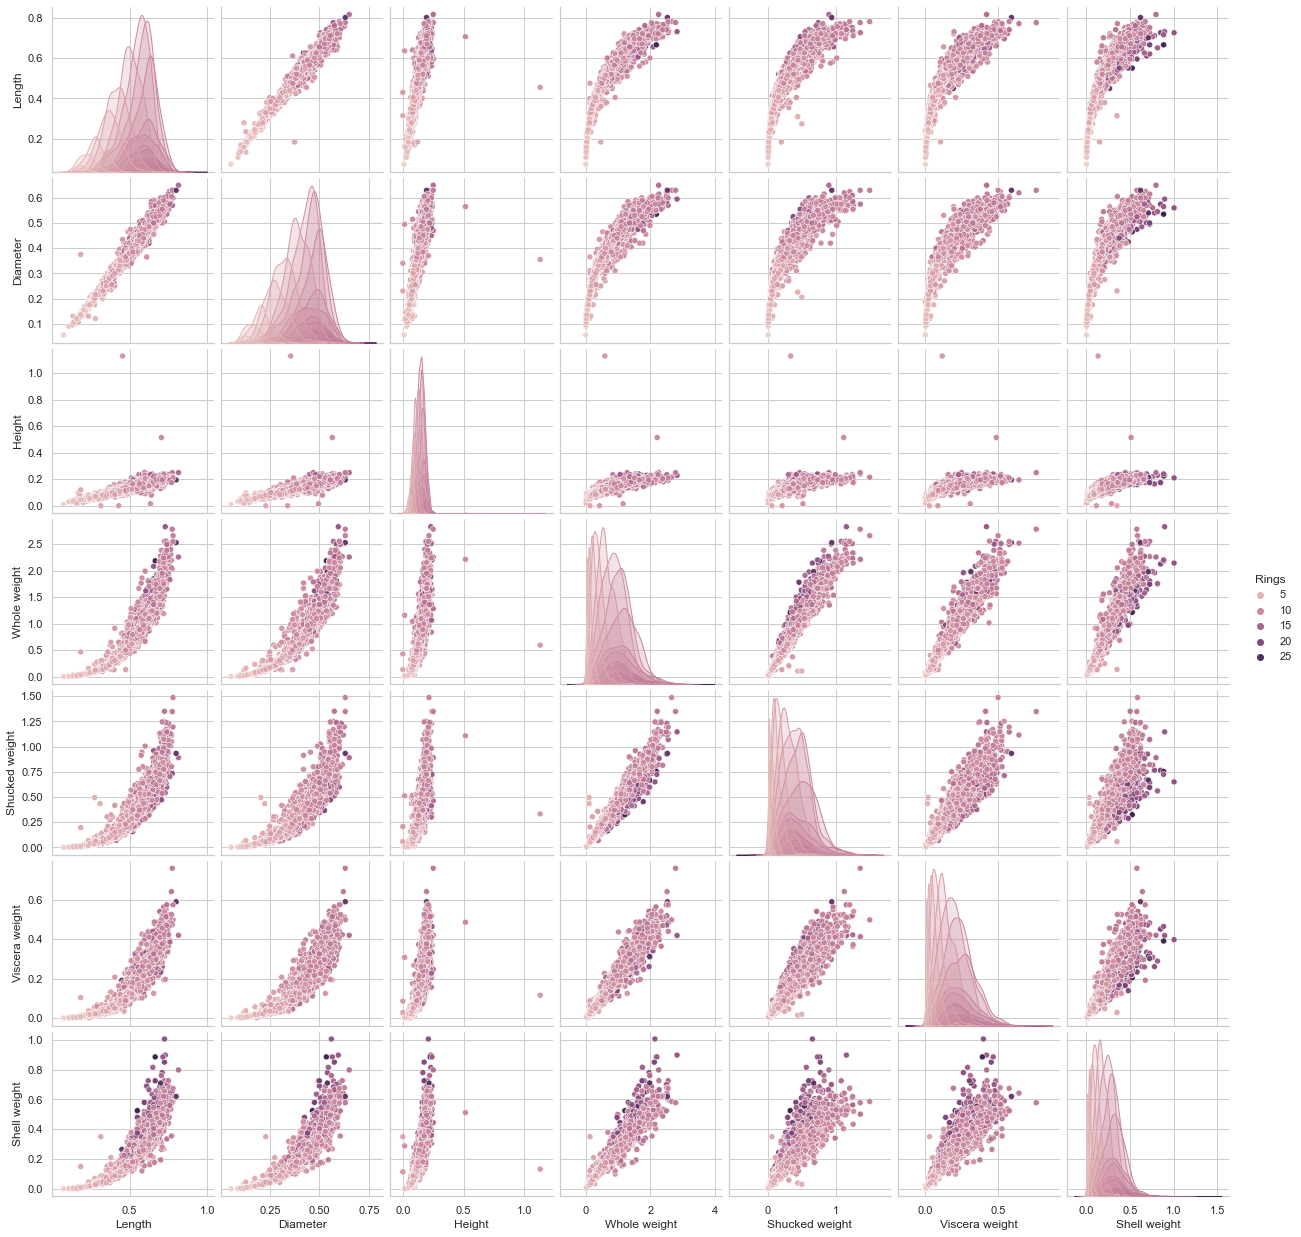

In [32]:
sns.set(style='whitegrid')
sns.pairplot(df,hue='Rings')
plt.show()

## Encoding- One Hot

As, Sex column is a string datatype , Applying One-hot encoding to convert into numeric value

In [33]:
dummies=pd.get_dummies(df['Sex'])
dummies

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
4172,1,0,0
4173,0,0,1
4174,0,0,1
4175,1,0,0


In [34]:
# Adding encoded sex column in the dataset
df=pd.concat([df,dummies],axis=1)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [35]:
# Dropping Sex column from the df dataset, as encoded sex column is already added
df=df.drop('Sex',axis=1)
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


## Removing Outliers

In [36]:
# Applying z-score
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.57455813, 0.43214879, 1.06442415, ..., 0.67483383, 0.68801788,
        1.31667716],
       [1.44898585, 1.439929  , 1.18397831, ..., 0.67483383, 0.68801788,
        1.31667716],
       [0.05003309, 0.12213032, 0.10799087, ..., 1.48184628, 0.68801788,
        0.75948762],
       ...,
       [0.6329849 , 0.67640943, 1.56576738, ..., 0.67483383, 0.68801788,
        1.31667716],
       [0.84118198, 0.77718745, 0.25067161, ..., 1.48184628, 0.68801788,
        0.75948762],
       [1.54905203, 1.48263359, 1.32665906, ..., 0.67483383, 0.68801788,
        1.31667716]])

we have converted all the negative vaue to positive using absolute function

In [37]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

We want values greater than 3 , so that we can remove the outliers


In [38]:
df_new=df[(z<3).all(axis=1)]

In [39]:
# Our new dataset where all all the outliers have been removed
df_new

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [40]:
df_new.shape

(4027, 11)

In [41]:
df_new.skew()

Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
F                 0.821149
I                 0.731618
M                 0.576507
dtype: float64

## Splitting data

In [42]:
y = df_new.Rings
x = df_new.drop('Rings',axis=1)

In [43]:
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


In [44]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4027, dtype: int64

## Exploring target variable

In [45]:
df['Rings'].count()

4177

In [46]:
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [47]:
# 9th Rings has the highest no of counts
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

## Splitting into Train and Test data

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=10)


Scaling x_train and x_test so that all values are of equal size

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [50]:
x_train

array([[ 1.02999513,  0.88446966,  0.03592658, ..., -0.65904737,
        -0.69690948,  1.30410916],
       [-1.83396946, -1.72438037, -1.46792244, ..., -0.65904737,
         1.43490659, -0.76680698],
       [-1.70178648, -1.56465485, -1.60463598, ..., -0.65904737,
         1.43490659, -0.76680698],
       ...,
       [-0.64432263, -0.60630178,  0.03592658, ..., -0.65904737,
         1.43490659, -0.76680698],
       [ 0.19283625,  0.29880945,  0.30935367, ...,  1.51734162,
        -0.69690948, -0.76680698],
       [ 0.72156818,  0.88446966,  0.03592658, ..., -0.65904737,
        -0.69690948,  1.30410916]])

In [51]:
y_train

3162    15
177      8
2216     7
2025    10
2132    10
        ..
3575     8
1414     9
570     16
3329    10
1359    10
Name: Rings, Length: 2698, dtype: int64

In [52]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.2618510158013544
[[ 0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  1 12  7  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  2 10 26 10  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  3 22 48 15  5  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  8 46 43 15  4  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 28 70 58 17  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  2 12 54 90 64 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 12 10 52 58 51  1  4  0  0  1  0  0  0]
 [ 0  0  0  0  4 16 27 53 39  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  2  5 16 35 21  0  6  0  0  2  0  0  0]
 [ 0  0  0  1  0  4  5 25 16  0 10  0  0  1  0  0  0]
 [ 0  0  0  0  0  4  3 21 11  0  3  1  0  1  1  0  0]
 [ 0  0  0  0  0  2  4 15  8  2  7  0  0  1  0  0  0]
 [ 0  0  0  0  0  1  1  9  1  0  5  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  3  7  6  0  2  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  4  3  1  2  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0  2  0  0  2  0  0  0]]
              precision    recall  f1-score   support

       

In [53]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.2016553799849511
[[ 0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  3  4  9  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7 12 17  8  2  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 13 22 21 23  8  3  2  0  1  0  1  0  0  0  0]
 [ 0  0  3 18 36 34 13  6  3  3  1  0  0  0  0  0  0]
 [ 0  0  0  7 37 47 42 26 10  4  4  5  1  0  0  0  0]
 [ 0  0  0  4 21 39 46 57 25 20 12  5  5  4  0  2  0]
 [ 0  0  0  4  3 13 39 40 41 18 15  5  0  5  3  1  2]
 [ 0  0  0  0 10 10 29 20 32 14  9  7  3  2  3  1  1]
 [ 0  0  0  0  3 10 12 17 14  8 10  4  6  2  0  1  0]
 [ 0  0  0  1  1  4  5  7 12  7 12  6  2  1  2  2  0]
 [ 0  0  0  0  2  7  8  4  2  6  3  3  3  3  3  0  1]
 [ 0  0  0  0  0  5  6  6  2  0  9  2  4  1  1  3  0]
 [ 0  0  0  0  0  2  2  0  3  3  2  2  0  3  1  0  0]
 [ 0  0  0  0  0  1  2  6  3  1  2  0  1  1  0  1  1]
 [ 0  0  0  0  0  1  2  4  0  1  2  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  1  1  2  2  0  1  0  1  1  0]]
              precision    recall  f1-score   support

       

In [54]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.23702031602708803
[[ 1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  3  9  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  8 22  9  4  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  6 26 36 16  8  1  0  0  0  0  0  0  0  0  0]
 [ 0  1  1 14 49 32 11  7  1  0  0  1  0  0  0  0  0]
 [ 0  0  1  0 33 65 47 29  6  0  2  0  0  0  0  0  0]
 [ 0  0  0  4 17 52 62 77 21  3  3  0  0  1  0  0  0]
 [ 0  0  0  1  3 20 42 52 55  7  4  1  1  1  1  0  1]
 [ 0  0  0  0  5 10 41 41 32  5  4  1  2  0  0  0  0]
 [ 0  0  0  0  1  6 18 24 21  5  9  0  1  0  1  1  0]
 [ 0  0  0  1  1  3  3 20 19  4  7  2  0  2  0  0  0]
 [ 0  0  0  0  0  4  6 15  9  3  5  0  0  2  0  1  0]
 [ 0  0  0  0  0  4  5 14  5  2  6  1  1  1  0  0  0]
 [ 0  0  0  0  0  1  2  4  5  0  1  3  1  0  1  0  0]
 [ 0  0  0  0  0  1  3  6  3  1  3  0  1  0  1  0  0]
 [ 0  0  0  0  0  1  1  1  2  1  2  0  0  3  0  0  0]
 [ 0  0  0  0  0  0  1  1  2  2  0  1  0  2  0  0  0]]
              precision    recall  f1-score   support

      

In [55]:
# SVC

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
ad_pred = svc.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.2686230248306998
[[ 0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  9  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  8 30 11  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 26 46  8 13  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9 53 30 18  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 30 63 56 30  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  2 12 49 87 79 11  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  7 48 91 39  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4 11 32 65 29  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  3 21 42 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  3 12 33 13  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  9 27  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  8 21  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  2 12  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3 13  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  8  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  6  3  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

       

In [56]:
#K nearest neighbors(KNN) Classifier

knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
knn.score(x_test,y_test)

0.20993227990970656

In [57]:
#GaussianNB

gauss = GaussianNB()
gauss.fit(x_train,y_train)
gauss.score(x_train,y_train)
gauss.score(x_test,y_test)

0.22573363431151242

## Cross Validation 

In [58]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Logistic Regression model :",scr.mean())

Cross validation score of Logistic Regression model : 0.2617372809518672


In [59]:

scr=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree model :",scr.mean())

Cross validation score of Decision Tree model : 0.2006550251992047


In [60]:
scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest model :",scr.mean())

Cross validation score of Random Forest model : 0.2537919023473021


In [61]:
scr=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of Support vector classifier :",scr.mean())

Cross validation score of Support vector classifier : 0.26248478029684197


## Hyper parameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
parameter = {'max_depth':np.arange(2,10),
            'criterion':['gini','entropy'],
            'min_samples_split':[2,3],
            'max_features' : ['auto','random'],
            'min_samples_leaf':[2,3]}

In [64]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [65]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'random'],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3]})

In [66]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [67]:
Final_mod = DecisionTreeClassifier(criterion='gini', max_depth= 6, min_samples_split = 2, min_samples_leaf = 2)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

26.56132430398796


## Saving the Data

In [68]:
import joblib
joblib.dump(Final_mod,"Finalmodel.pk1")

['Finalmodel.pk1']